In [38]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt

In [39]:
rankings = pd.read_csv('data/fifa_ranking_full.csv')
results = pd.read_csv('data/results.csv',index_col=1)

In [40]:
results.reset_index(inplace=True)
results.head()

,home_team,date,away_team,home_score,away_score,tournament,city,country,neutral
0,Scotland,1872-11-30,England,0,0,Friendly,Glasgow,Scotland,False
1,England,1873-03-08,Scotland,4,2,Friendly,London,England,False
2,Scotland,1874-03-07,England,2,1,Friendly,Glasgow,Scotland,False
3,England,1875-03-06,Scotland,2,2,Friendly,London,England,False
4,Scotland,1876-03-04,England,3,0,Friendly,Glasgow,Scotland,False


In [41]:
rankings = rankings[['year','month','country_full','rank','rank_date']]
rankings.head()

,year,month,country_full,rank,rank_date
0,1992,12,Germany,1,1992-12-31
1,1992,12,Italy,2,1992-12-31
2,1992,12,Brazil,3,1992-12-31
3,1992,12,Sweden,4,1992-12-31
4,1992,12,England,5,1992-12-31


In [42]:
#create year column from rank_date
rankings['year'] = rankings['rank_date'].str[:4]
#create month column from rank_date
rankings['month'] = rankings['rank_date'].str[5:7]

#create year column in results from date column
results['year'] = results['date'].str[:4]
#create month column in results from date column
results['month'] = results['date'].str[5:7]

In [43]:
#join rankings and results on year and month and home_team and away_team
df = pd.merge(rankings,results,left_on=['year','month','country_full'],right_on=['year','month','home_team'],how='inner')

df = pd.merge(rankings,df,left_on=['year','month','country_full'],right_on=['year','month','away_team'],how='inner')

In [44]:
df.head()

,year,month,country_full_x,rank_x,rank_date_x,country_full_y,rank_y,rank_date_y,home_team,date,away_team,home_score,away_score,tournament,city,country,neutral
0,1992,12,Germany,1,1992-12-31,Brazil,3,1992-12-31,Brazil,1992-12-16,Germany,3,1,Friendly,Porto Alegre,Brazil,False
1,1992,12,Germany,1,1992-12-31,Uruguay,16,1992-12-31,Uruguay,1992-12-20,Germany,1,4,Friendly,Montevideo,Uruguay,False
2,1992,12,Italy,2,1992-12-31,Malta,73,1992-12-31,Malta,1992-12-19,Italy,1,2,FIFA World Cup qualification,Attard,Malta,False
3,1992,12,Netherlands,7,1992-12-31,Turkey,42,1992-12-31,Turkey,1992-12-16,Netherlands,1,3,FIFA World Cup qualification,Istanbul,Turkey,False
4,1992,12,Nigeria,13,1992-12-31,Congo,90,1992-12-31,Congo,1992-12-20,Nigeria,0,1,FIFA World Cup qualification,Pointe-Noire,Congo,False


In [45]:
df = df[['year','month','home_team','away_team','home_score','away_score','rank_x','rank_y','date','country','tournament','neutral']]
df.columns = ['year','month','home_team','away_team','home_score','away_score','away_rank','home_rank','date','country','tournament','neutral']
df

,year,month,home_team,away_team,home_score,away_score,away_rank,home_rank,date,country,tournament,neutral
0,1992,12,Brazil,Germany,3,1,1,3,1992-12-16,Brazil,Friendly,False
1,1992,12,Uruguay,Germany,1,4,1,16,1992-12-20,Uruguay,Friendly,False
2,1992,12,Malta,Italy,1,2,2,73,1992-12-19,Malta,FIFA World Cup qualification,False
3,1992,12,Turkey,Netherlands,1,3,7,42,1992-12-16,Turkey,FIFA World Cup qualification,False
4,1992,12,Congo,Nigeria,0,1,13,90,1992-12-20,Congo,FIFA World Cup qualification,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21104,2021,12,Jordan,Palestine,5,1,104,95,2021-12-07,Qatar,Arab Cup,True
21105,2021,12,Algeria,Sudan,4,0,123,33,2021-12-01,Qatar,Arab Cup,True
21106,2021,12,Lebanon,Sudan,1,0,123,93,2021-12-07,Qatar,Arab Cup,True
21107,2021,12,Malawi,Comoros,2,1,131,115,2021-12-31,Saudi Arabia,Friendly,True


AxesSubplot(0.125,0.125;0.775x0.755)


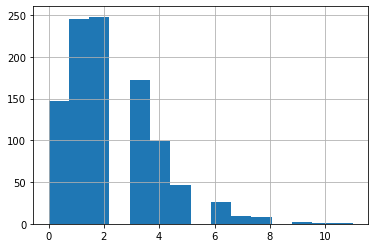

In [46]:
#fig, axs = plt.subplots(2,2,figsize=(15,15))
#axs[0,0]
#plot  hist of home_score for home_rank between 1 and 10
print(df.home_score[df.home_rank.between(1,5)].hist(bins=15))

AxesSubplot(0.125,0.125;0.775x0.755)


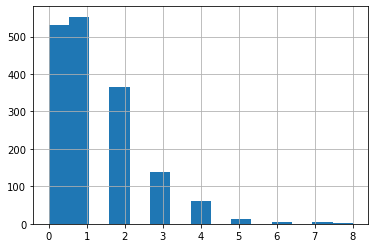

In [47]:

print(df.away_score[df.away_rank.between(20,30)].hist(bins=15))


AxesSubplot(0.125,0.125;0.775x0.755)


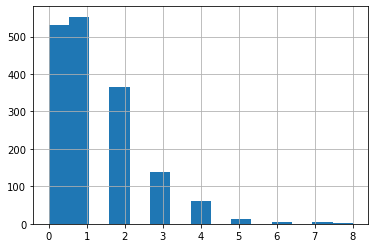

In [48]:

print(df.away_score[df.away_rank.between(20,30)].hist(bins=15))


AxesSubplot(0.125,0.125;0.775x0.755)


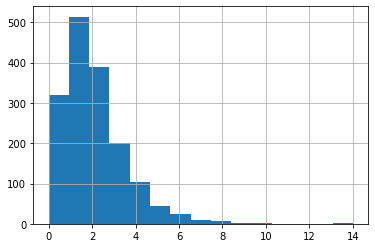

In [49]:

print(df.home_score[df.home_rank.between(20,30)].hist(bins=15))


AxesSubplot(0.125,0.125;0.775x0.755)


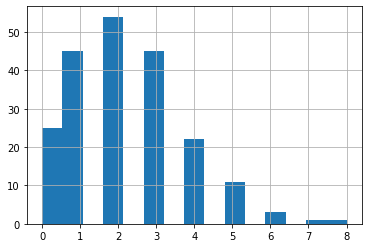

In [50]:

print(df.home_score[df.home_rank.between(1,5) & df.away_rank.between(30,50)].hist(bins=15))


AxesSubplot(0.125,0.125;0.775x0.755)


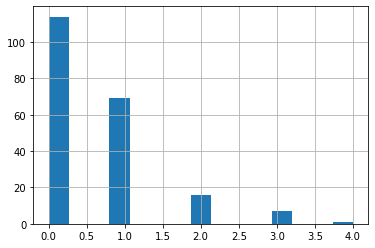

In [51]:

print(df.away_score[df.away_rank.between(30,50) & df.home_rank.between(1,5)].hist(bins=15))

